In [484]:
import pymongo as pm
import gridfs
import cPickle
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import pylab

from scipy import misc
import os
import time

import jupyter_utils as utils

In [507]:
reload(utils)

def tfr(colname, exp_id):
    return utils.TfutilsReader('instance_task', colname, exp_id, port=27009, cache_dir='/mnt/fs3/azhai/checkpoints')

tr_small = tfr('control', 'small')
tr_full = tfr('control', 'full')
tr_denom = tfr('control', 'compute_denom')

tr_croponly = tfr('data_augmentation', 'resnet_crop_only')
tr_noflip = tfr('data_augmentation', 'resnet_noflip')
tr_nocrop = tfr('data_augmentation', 'resnet_nocrop')
tr_bigcrop = tfr('data_augmentation', 'resnet_bigcrop')

tr_static_nn2_from_ep220 = tfr('clustering', 'static_nn2_from_ep220')
tr_static_nn2_restart = tfr('clustering', 'static_nn2_from_ep220_restart')
tr_static_nn2_round2 = tfr('clustering', 'static_nn2_from_ep220_round2')
tr_static_nn3 = tfr('clustering', 'static_nn3_from_nn2')

tr_supervised = tfr('clustering', 'supervised_classes_sample64')
tr_supervised2 = tfr('clustering', 'supervised_classify')

tr_kmeans = tfr('clustering', 'kmeans220_classify')
tr_kmeans_rd2 = tfr('clustering', 'kmeans220_classify_rd2')
tr_kmeans_from100 = tfr('clustering', 'kmeans220_classify_from100')
tr_kmeans64 = tfr('clustering', 'kmeans220_sample64')

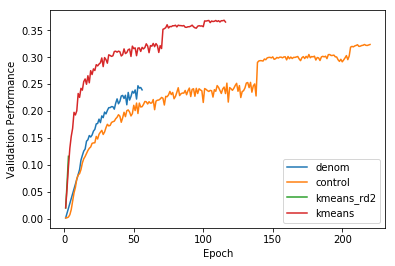

In [511]:
training_plot = utils.ValidationPlot()

results = utils.load_validation_results(tr_denom, ['topn', 'top1'], steps_per_epoch=10009)
training_plot.add('denom', results)

results = utils.load_validation_results(tr_static_nn2_from_ep220, ['topn', 'top1'], steps_per_epoch=10009)
#training_plot.add('static_nn2', results)
results = utils.load_validation_results(tr_static_nn2_round2, ['topn', 'top1'], steps_per_epoch=10009)
results2 = utils.load_validation_results(tr_static_nn2_restart, ['topn', 'top1'], steps_per_epoch=10009)
#training_plot.add('static_nn2_round2', results + results2)
results = utils.load_validation_results(tr_static_nn3, ['topn', 'top1'], steps_per_epoch=10009)
#training_plot.add('static_nn3', results)

results = utils.load_validation_results(tr_supervised2, ['topn', 'top1'], steps_per_epoch=10009)
#training_plot.add('supervised', results)

results = utils.load_validation_results(tr_kmeans, ['topn', 'top1'], steps_per_epoch=10009)
training_plot.add('kmeans', results)
results = utils.load_validation_results(tr_kmeans_rd2, ['topn', 'top1'], steps_per_epoch=10009)
training_plot.add('kmeans_rd2', results)
#results = utils.load_validation_results(tr_kmeans_from100, ['topn', 'top1'], steps_per_epoch=10009)
#training_plot.add('kmeans_from_100', results)
#results = utils.load_validation_results(tr_kmeans64, ['topn', 'top1'], steps_per_epoch=10009)
#training_plot.add('kmeans_sample64', results)

results = utils.load_validation_results(tr_full, ['topn', 'top1'], steps_per_epoch=10009)
training_plot.add('control', results)

#training_plot.plot(start=100, end=250)
training_plot.plot(start=0, end=220)

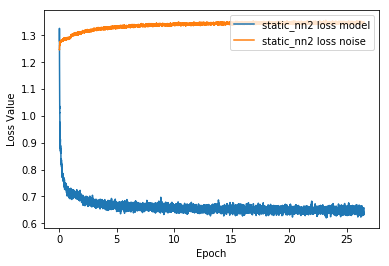

In [384]:
loss_plot = utils.LossPlot()

results = utils.load_loss_results(tr_static_nn2, 'loss_model')
loss_plot.add('static_nn2 loss model', results, start_epoch=100)
results = utils.load_loss_results(tr_static_nn2, 'loss_noise')
loss_plot.add('static_nn2 loss noise', results, start_epoch=100)

'''
results = utils.load_loss_results(tr_static_nn2_1gpu, 'loss_model')
loss_plot.add('static_nn2_1gpu loss model', results, start_epoch=170)
results = utils.load_loss_results(tr_static_nn2_1gpu, 'loss_noise')
loss_plot.add('static_nn2_1gpu loss noise', results, start_epoch=170)

results = utils.load_loss_results(tr_full, 'loss_model')
loss_plot.add('control loss model', results)
results = utils.load_loss_results(tr_full, 'loss_noise')
loss_plot.add('control loss noise', results)
'''

loss_plot.plot(start=100, end=130)

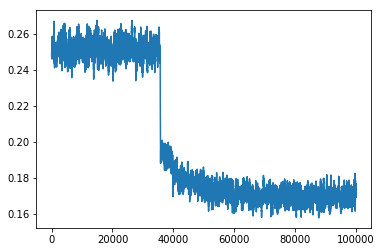

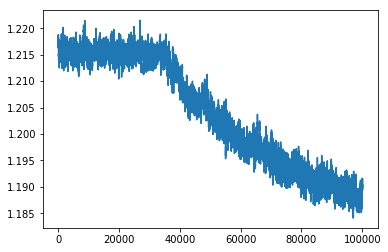

In [8]:
results = utils.load_loss_results(tr_full, 'loss_model')
results = results[10009 * 135:10009 * 145]
#results = results[:977 * 20]
plt.plot(range(len(results)), results)
plt.show()

results = utils.load_loss_results(tr_full, 'loss_noise')
results = results[10009 * 135:10009 * 145]
#results = results[:977 * 20]
plt.plot(range(len(results)), results)

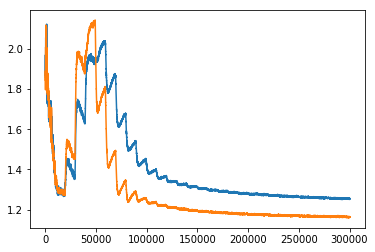

In [12]:
results = utils.load_loss_results(tr_full, 'loss_noise')
results = results[:10009 * 30]
#results = results[:977 * 20]
plt.plot(range(len(results)), results)

results = utils.load_loss_results(tr_bigcrop, 'loss_noise')
results = results[:10009 * 30]
#results = results[:977 * 20]
plt.plot(range(len(results)), results)

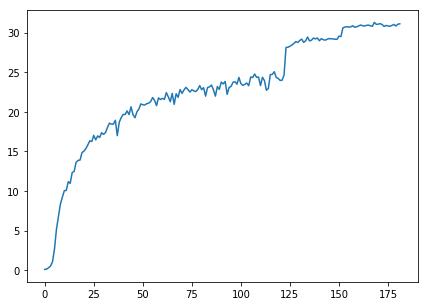

In [133]:
## An old control experiment

plt.figure(figsize=(7, 5))

kwargs_tf = {
    'perf_detail_str':'780/781',
    'perf_str':'Ave Top1:',
    'mult_num':100,    
}
utils.show_instance_perf(
    txt_path='/home/chengxuz/previous_logs/log_performance_instance_fx_color_resize_amr.txt',
    **kwargs_tf
    )